In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scanpy as sc

2023-08-10 18:21:20.797650: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.


Text(50.722222222222214, 0.5, 'Number of Macrogenes')

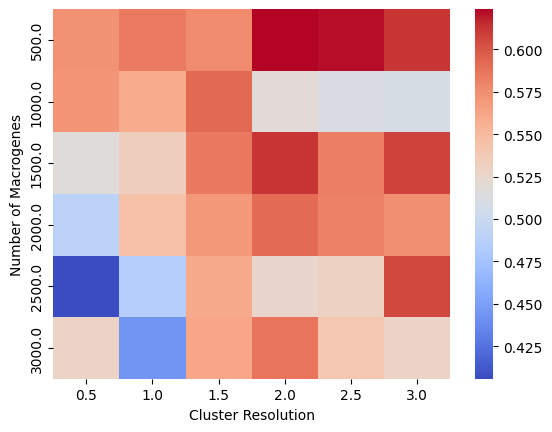

In [14]:
#for all runs below, leiden clusters were used to guide integration. Values for heatmap represent label transfer accuracy
#results of parametrization runs are stores in csv files
#read in csv file and plot accuracy heatmap
res = pd.read_csv("/home/apennacchio/pcsct/saturn/summary.csv")
heatmap_data = res.pivot_table(index='num_macrogenes', columns='cluster_res', values='label_transfer')
#for this run, HV genes were preextracted using scanpy. Changed number of macrogenes and cluster resolution
#default HV macrogenes used by SATURN (8000)
sns.heatmap(heatmap_data, cmap='coolwarm', fmt='.2f', cbar=True)
plt.xlabel("Cluster Resolution")
plt.ylabel("Number of Macrogenes")


Text(50.722222222222214, 0.5, 'Number of Macrogenes')

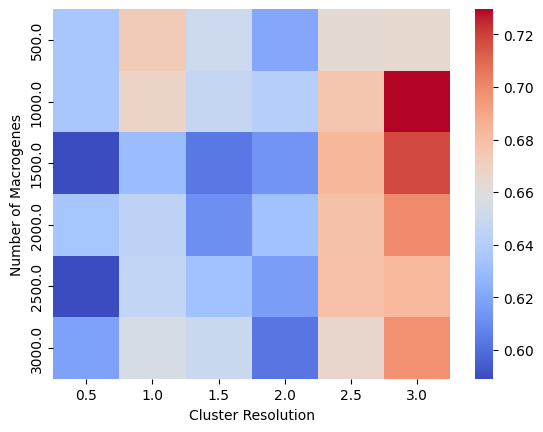

In [12]:
#for this run, HV genes were NOT extracted using scanpy (SATURN used instead). Changed number of macrogenes and cluster resolution
#default HV used by SATURN (8000)
res1 = pd.read_csv("/home/apennacchio/pcsct/saturn/summary_noHV.csv")
heatmap_data1 = res1.pivot_table(index='num_macrogenes', columns='cluster_res', values='label_transfer')
sns.heatmap(heatmap_data1, cmap='coolwarm', fmt='.2f', cbar=True)
plt.xlabel("Cluster Resolution")
plt.ylabel("Number of Macrogenes")

Text(50.722222222222214, 0.5, 'Number of HV Genes')

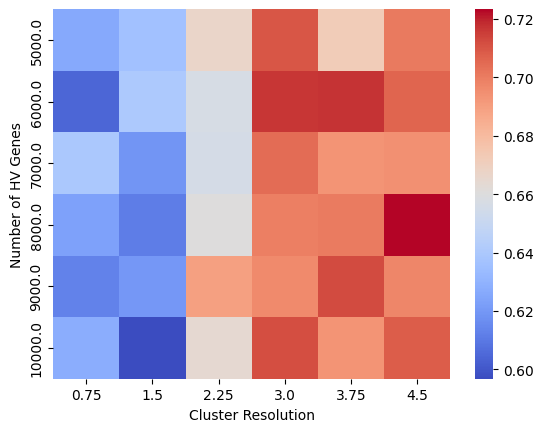

In [13]:
#for this run, HV genes were NOT extracted using scanpy (SATURN used instead). Changed number of HV genes and cluster resolution
#default macrogenes used by SATURN (2000)
res2 = pd.read_csv("/home/apennacchio/pcsct/saturn/summary_num_HV.csv")
heatmap_data2 = res2.pivot_table(index='num_HV', columns='cluster_res', values='label_transfer')
sns.heatmap(heatmap_data2, cmap='coolwarm', fmt='.2f', cbar=True)
plt.xlabel("Cluster Resolution")
plt.ylabel("Number of HV Genes")

In [20]:
#load in data before doing 6x6 UMAP plot
anndata_list = []

for i in [0.5, 1, 1.5, 2, 2.5, 3]:
    for j in [500, 1000, 1500, 2000, 2500, 3000]:
        adata = sc.read("/home/apennacchio/pcsct/saturn/out/" + str(i) + "_" + str(j) + "noHV/test256_data_sbicolor_root10_integrated_zmays23_org_saturn_seed_0.h5ad")
        anndata_list.append(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Fal

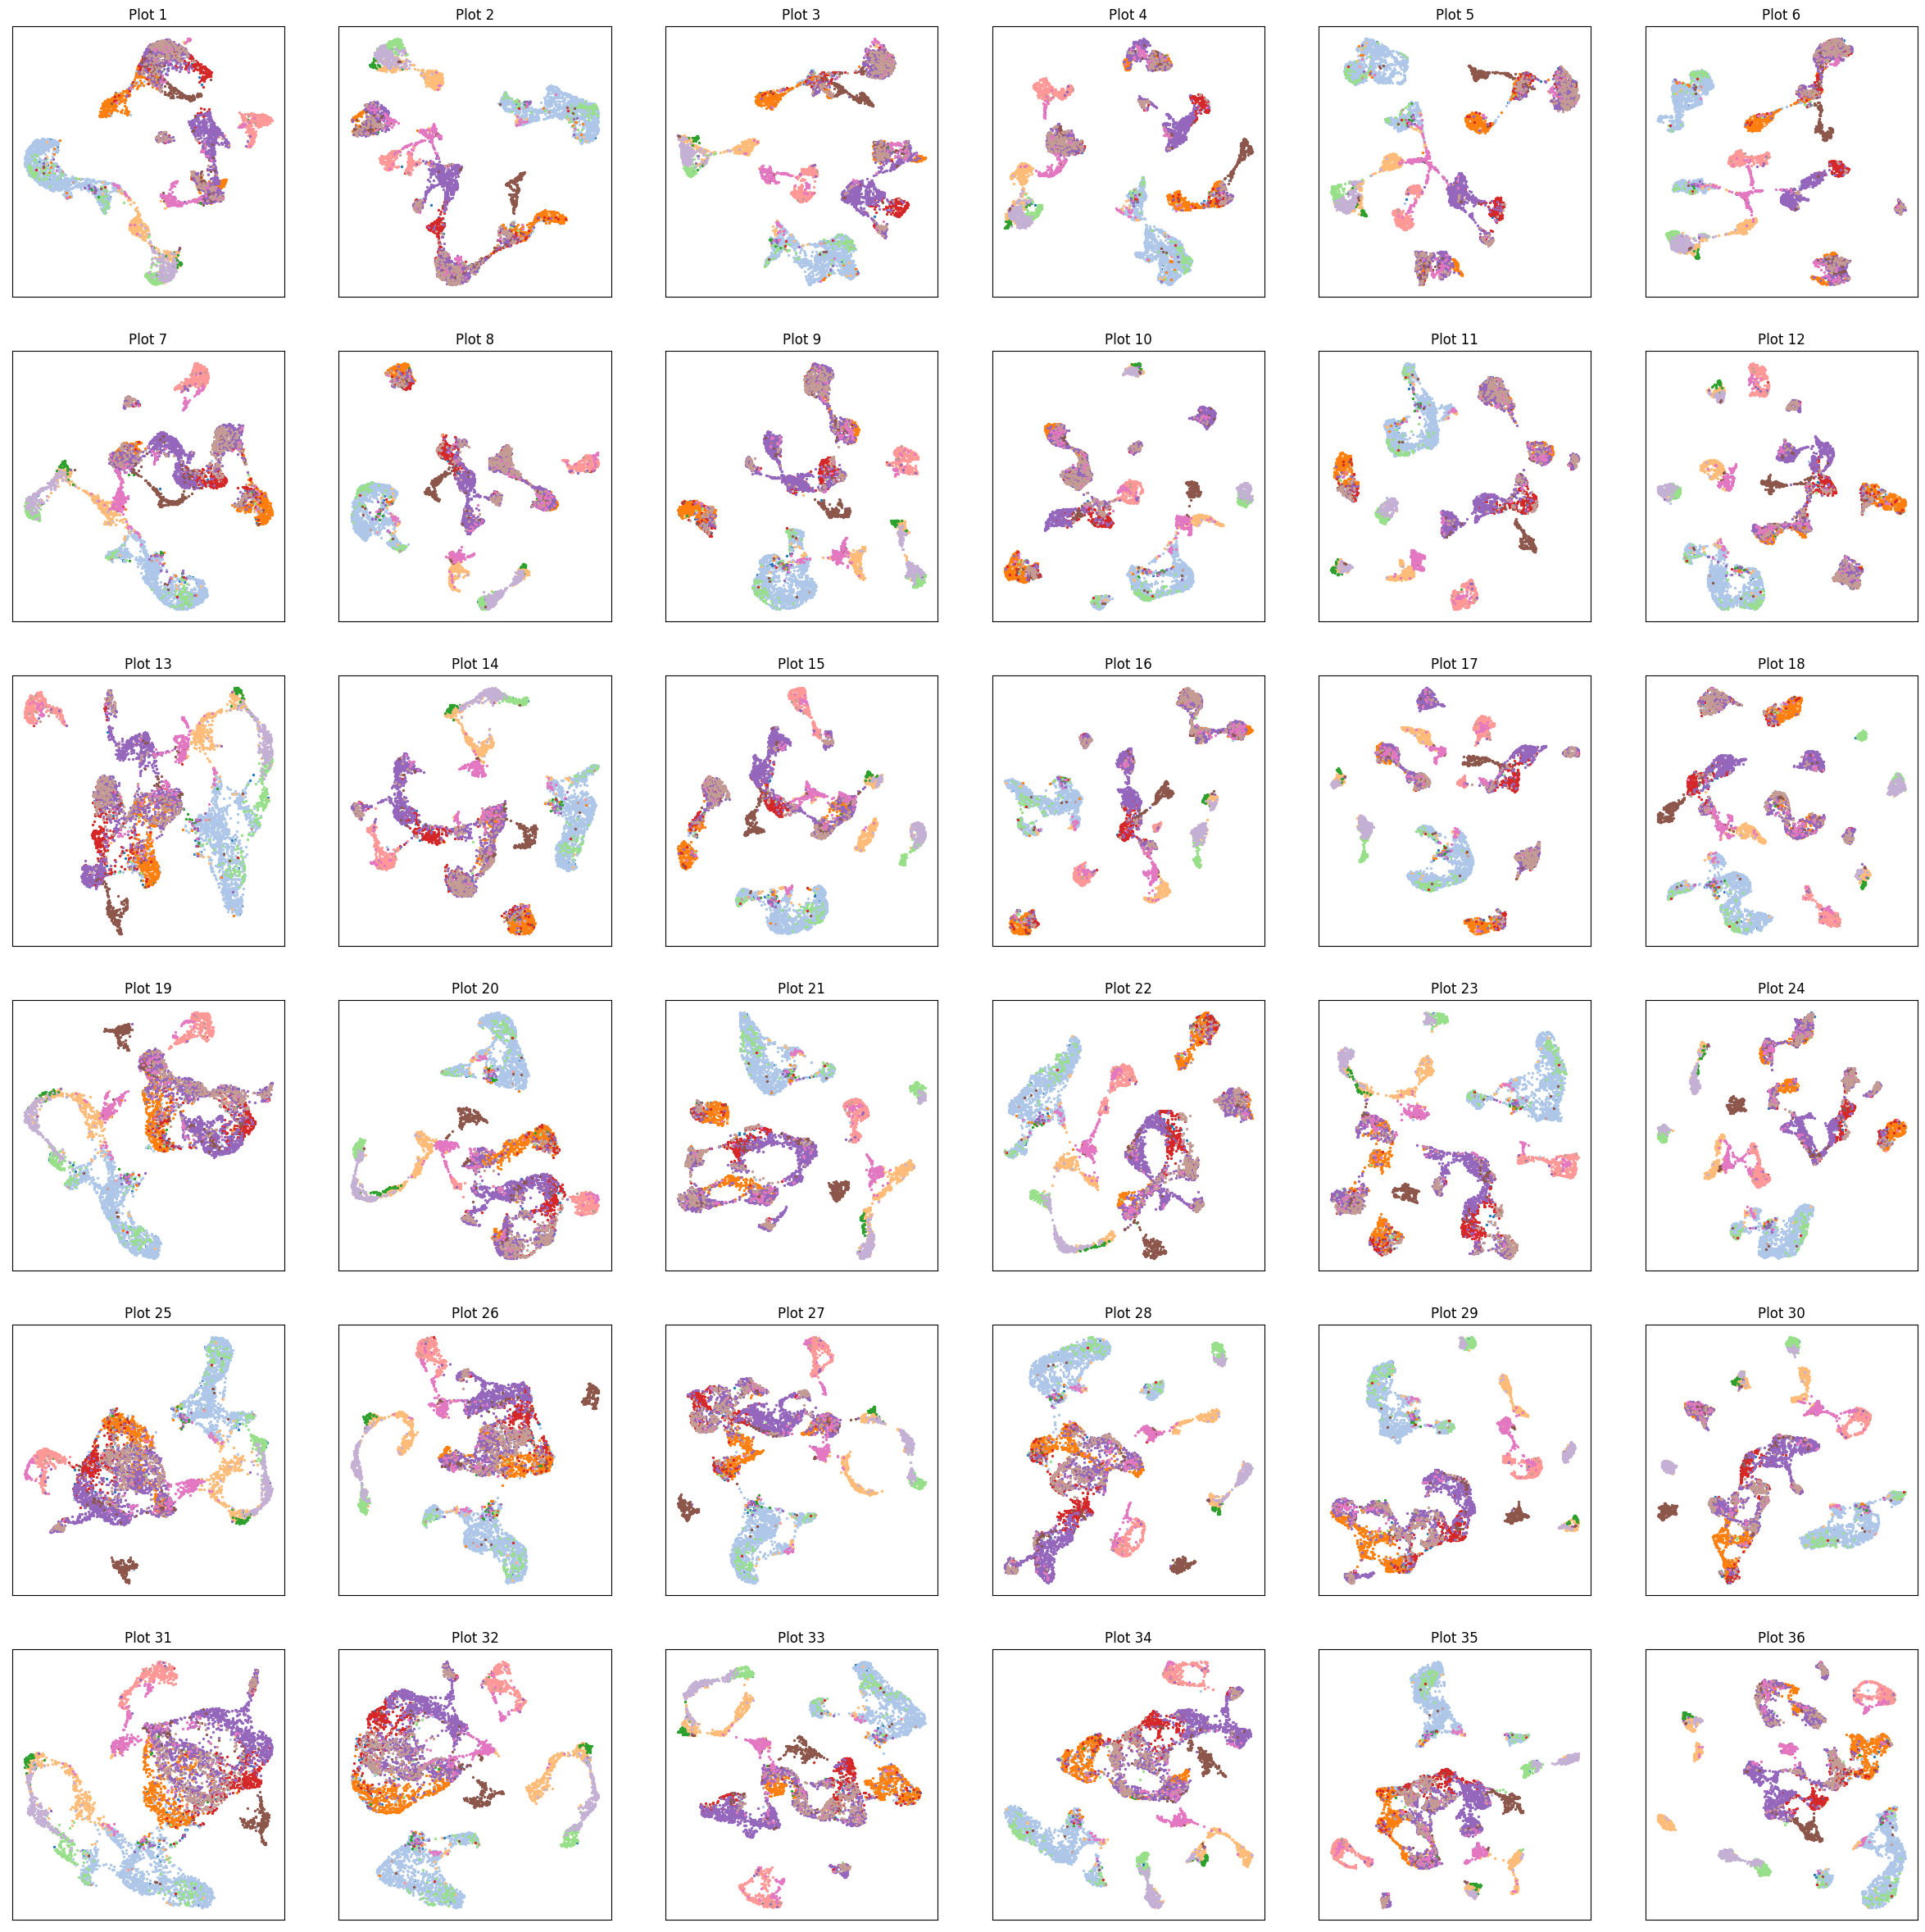

In [21]:

# Assuming you have a list named 'anndata_list' with your 36 Anndata objects

# Create a 6x6 grid of subplots
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(30, 30))

# Flatten the axes array to iterate over the subplots easily
axes_flat = axes.flatten()

# Define a colormap for cell types
cmap = plt.get_cmap('tab20')

# Loop through each subplot and plot the UMAP colored by "cell_type" for the corresponding Anndata object
for i, ax in enumerate(axes_flat):
    if i < len(anndata_list):  # To avoid IndexError if 'anndata_list' is smaller than the grid size
        anndata_obj = anndata_list[i]

        # Calculate UMAP coordinates using scanpy's pl.umap function
        sc.pp.neighbors(anndata_obj)
        sc.tl.umap(anndata_obj)

        # Access UMAP coordinates and cell types from Anndata object
        umap_result = anndata_obj.obsm['X_umap']
        cell_types = anndata_obj.obs['ref_labels']

        # Get unique cell types to assign colors from the colormap
        unique_cell_types = np.unique(cell_types)

        # Plot each cell type with a different color
        for j, cell_type in enumerate(unique_cell_types):
            mask = cell_types == cell_type
            ax.scatter(umap_result[mask, 0], umap_result[mask, 1], s=2, color=cmap(j), label=cell_type)

        # Remove axis ticks and labels for cleaner visualizations
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(f"Plot {i + 1}")

plt.show()
